 Task 03 using the UCI Bank Marketing dataset:

1) Load & inspect the data

2) Preprocess (encode categoricals, split)

3) Train a Decision Tree classifier

4) Evaluate its performance

5) Visualize the tree and feature importances

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
import pandas as pd

# Load the local CSV you uploaded
df = pd.read_csv('bank-full.csv', sep=';')

# Quick check
print(df.shape)
print(df.columns.tolist()[:10], '…')
df.head()

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day'] …


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# 2) Preprocessing
#  - target: y → 1 if 'yes', 0 if 'no'
df['y'] = df['y'].map({'yes':1, 'no':0})

#  - features & target
X = df.drop(columns='y')
y = df['y']

#  - categorical vs numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [7]:
# 3) Build a pipeline: one‐hot encode cats, then Decision Tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# assume cat_cols and num_cols are already defined…

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

clf = Pipeline([
    ('prep', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
])


In [8]:
# 4) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [9]:
# 5) Fit the model
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))])

In [10]:
# 6) Predictions & evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.900026541626117

Classification Report:
              precision    recall  f1-score   support

           0      0.918     0.974     0.945      9981
           1      0.634     0.344     0.446      1322

    accuracy                          0.900     11303
   macro avg      0.776     0.659     0.696     11303
weighted avg      0.885     0.900     0.887     11303

Confusion Matrix:
 [[9718  263]
 [ 867  455]]


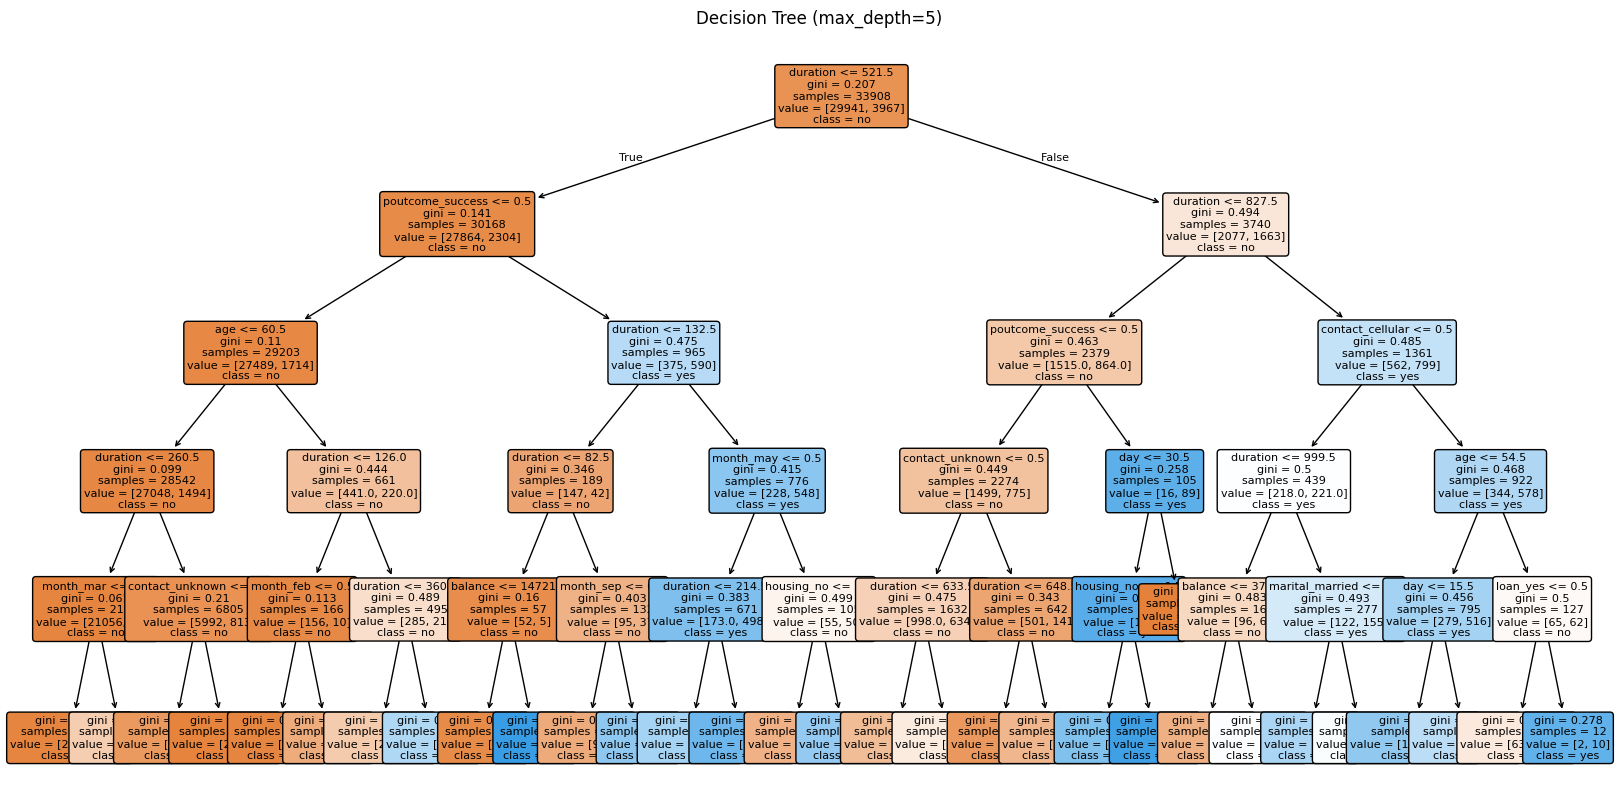

In [11]:
# 7) Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(
    clf.named_steps['dt'],
    feature_names=(
        clf.named_steps['prep']
           .named_transformers_['ohe']
           .get_feature_names_out(cat_cols)
        .tolist() + num_cols
    ),
    class_names=['no','yes'],
    filled=True, rounded=True, fontsize=8
)
plt.title("Decision Tree (max_depth=5)")
plt.show()

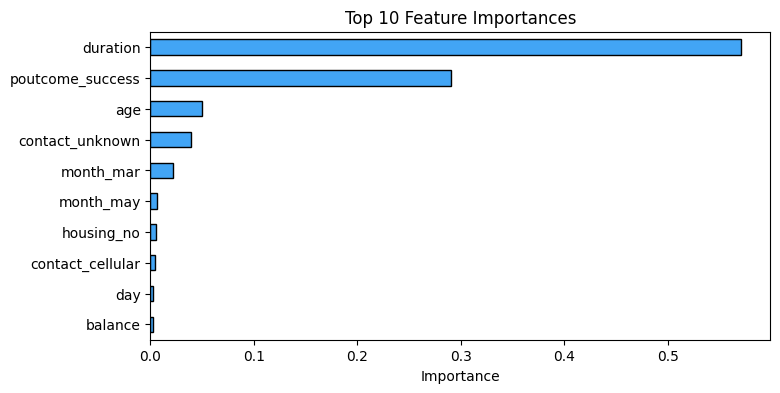

In [12]:
# 8) Feature importances (top 10)
importances = pd.Series(
    clf.named_steps['dt'].feature_importances_,
    index=(
        clf.named_steps['prep']
           .named_transformers_['ohe']
           .get_feature_names_out(cat_cols)
        .tolist() + num_cols
    )
)
top10 = importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top10.plot(kind='barh', color='#42a5f5', edgecolor='k')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.900026541626117
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9981
           1       0.63      0.34      0.45      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.88      0.90      0.89     11303

Confusion Matrix:
 [[9718  263]
 [ 867  455]]
